# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [353]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [354]:
# Checking the number of mice.
num_mice = len(mouse_study_merged["Mouse ID"])
num_mice

1893

In [355]:
# Our data should be uniquely identified by Mouse ID and Timepoint
grouped_counts = mouse_study_merged.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='Count')


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = grouped_counts[grouped_counts['Count'] > 1]
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [356]:
# Optional: Get all the data for the duplicate mouse ID. 
D_mouse_ID_Data_list = [mouse_study_merged[mouse_study_merged["Mouse ID"] == ID] for ID in duplicate_mice_ids]
D_mouse_ID_Data = pd.concat(D_mouse_ID_Data_list)
D_mouse_ID_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [357]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_list = [mouse_study_merged[mouse_study_merged["Mouse ID"] != ID] for ID in duplicate_mice_ids]
clean_data = pd.concat(clean_data_list).drop_duplicates()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [358]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data['Mouse ID'])
num_mice

1880

## Summary Statistics

In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = clean_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
var_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    'Mean Tumor Volume': round(mean_tumor_volume,2),
    'Median Tumor Volume': round(median_tumor_volume,2),
    'Tumor Volume Variance': round(var_tumor_volume,2),
    'Tumor Volume Standard Deviation': round(std_tumor_volume,2),
    'Tumor Volume SEM': round(sem_tumor_volume,2)
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [360]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',median='median',variance='var',std_dev='std',sem='sem')

summary_stats

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

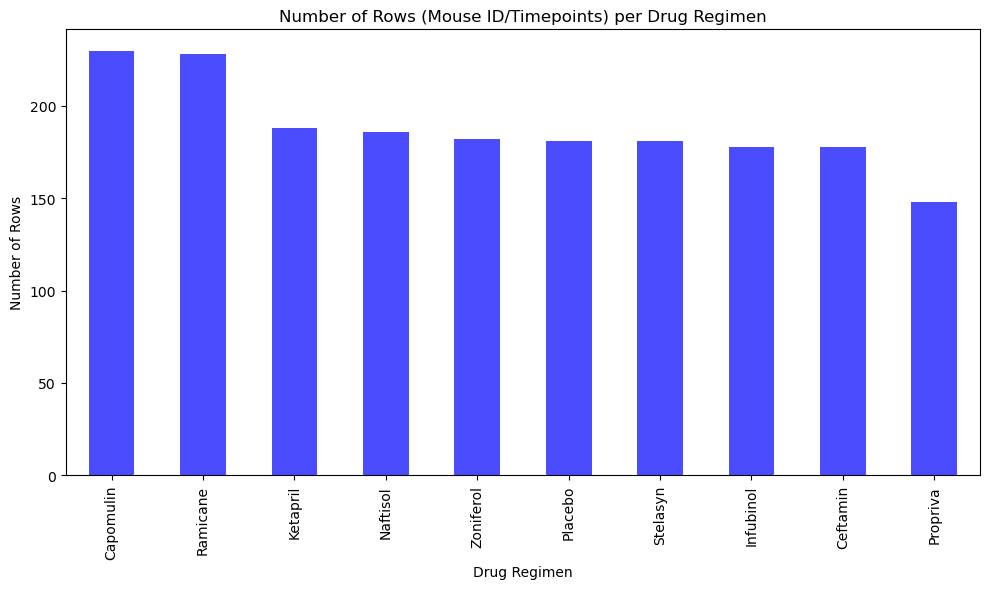

In [361]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()

regimen_counts.plot(kind='bar',color='blue',alpha=0.7, figsize=(10,6))

plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.tight_layout()
plt.show()

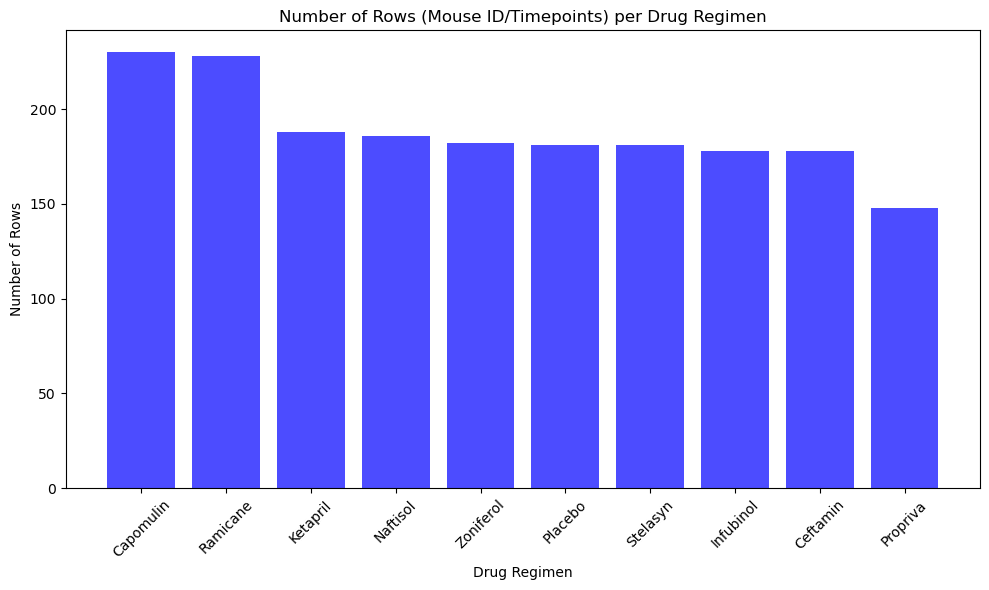

In [362]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = regimen_counts.index

plt.figure(figsize=(10,6))
plt.bar(x_axis, regimen_counts, color='blue', alpha=0.7)

plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

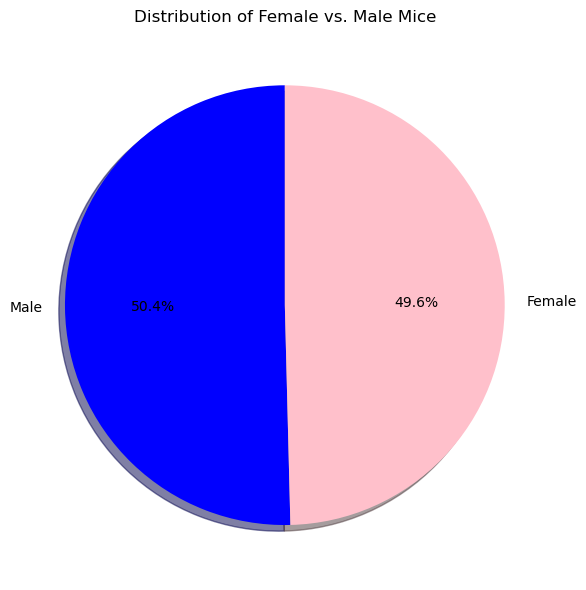

In [363]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data.drop_duplicates('Mouse ID')['Sex'].value_counts()

# Generate a pie plot using pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], shadow=True, figsize=(8,6))

plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('') # This is to remove the 'Sex' label that pandas automatically adds
plt.tight_layout()
plt.show()

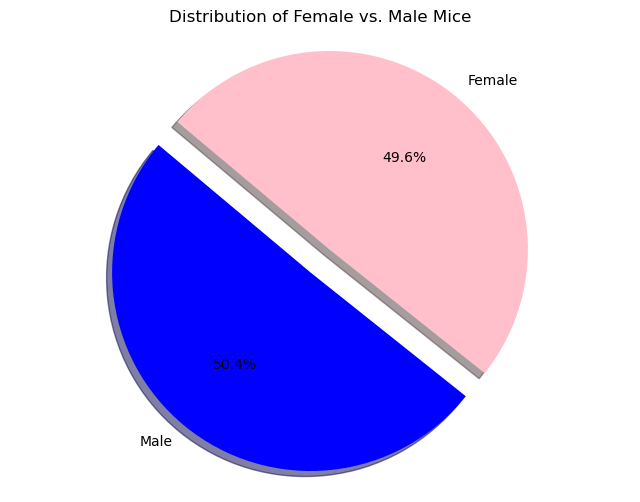

In [364]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

labels = gender_distribution.index
sizes = gender_distribution.values
colors = ['blue', 'pink']
explode = (0.15, 0)  # explode the 1st slice (i.e., 'Female') for emphasis

plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [365]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [366]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        final_tumor_vol = final_tumor_data[final_tumor_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
        tumor_vol_data.append(final_tumor_vol)

    
    # Determine outliers using upper and lower bounds
        quartiles = final_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        #Find the outliers
        outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
        print(f"{drug}'s potential outliers: {outliers.values}")



Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


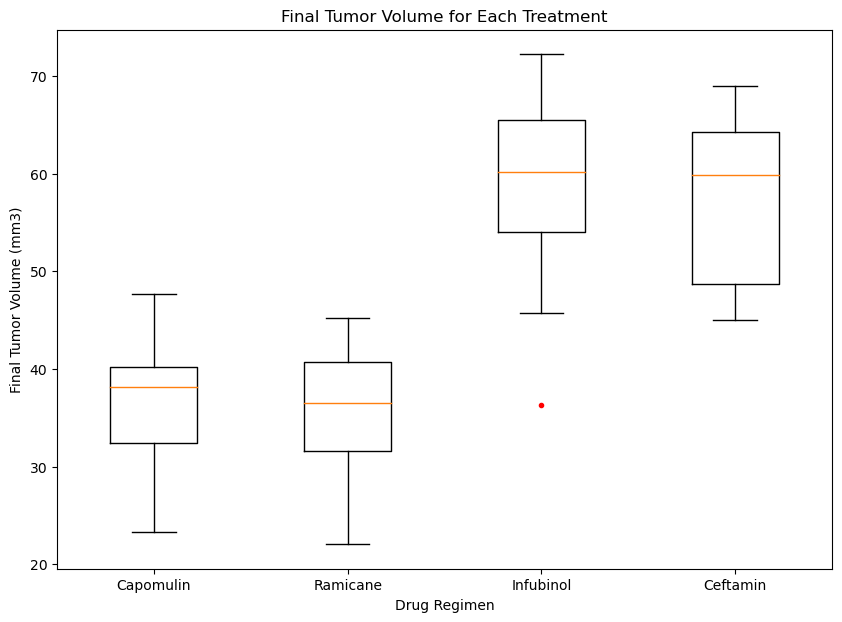

In [367]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))
plt.title('Final Tumor Volume for Each Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.boxplot(tumor_vol_data, labels=treatment_regimens, sym='r.')
plt.show()


## Line and Scatter Plots

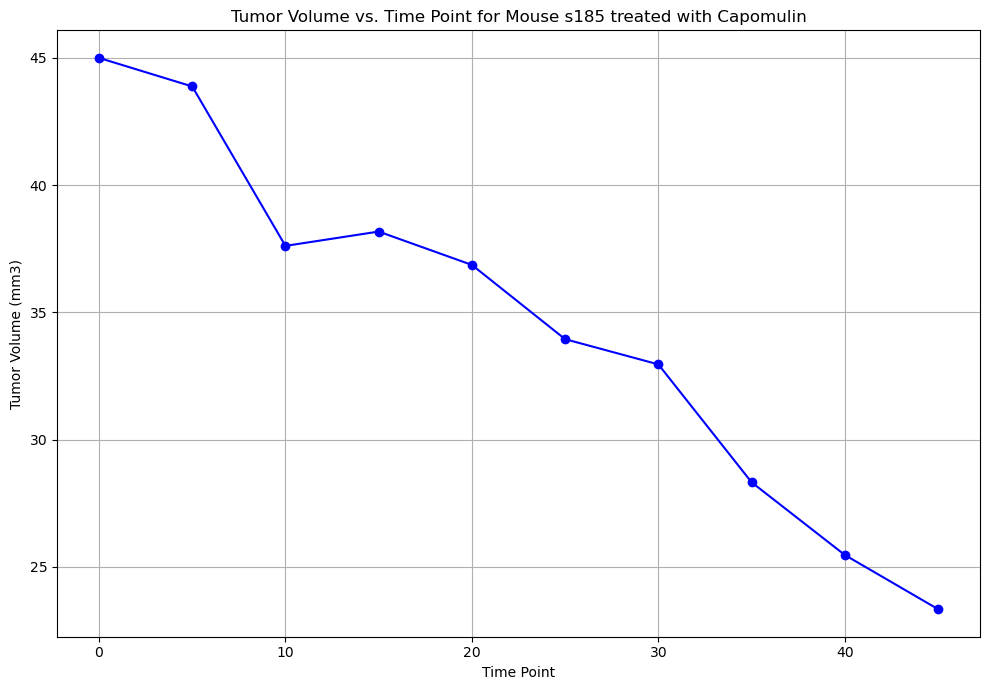

In [368]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Take the data for the first mouse 
mouse_id = capomulin_data['Mouse ID'].iloc[0]
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Extract the time points and corresponding tumor volumes
time_points = single_mouse_data['Timepoint']
tumor_volumes = single_mouse_data['Tumor Volume (mm3)']

# Generate a line plot using plt.plot()
plt.figure(figsize=(10, 7))
plt.plot(time_points, tumor_volumes, marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()







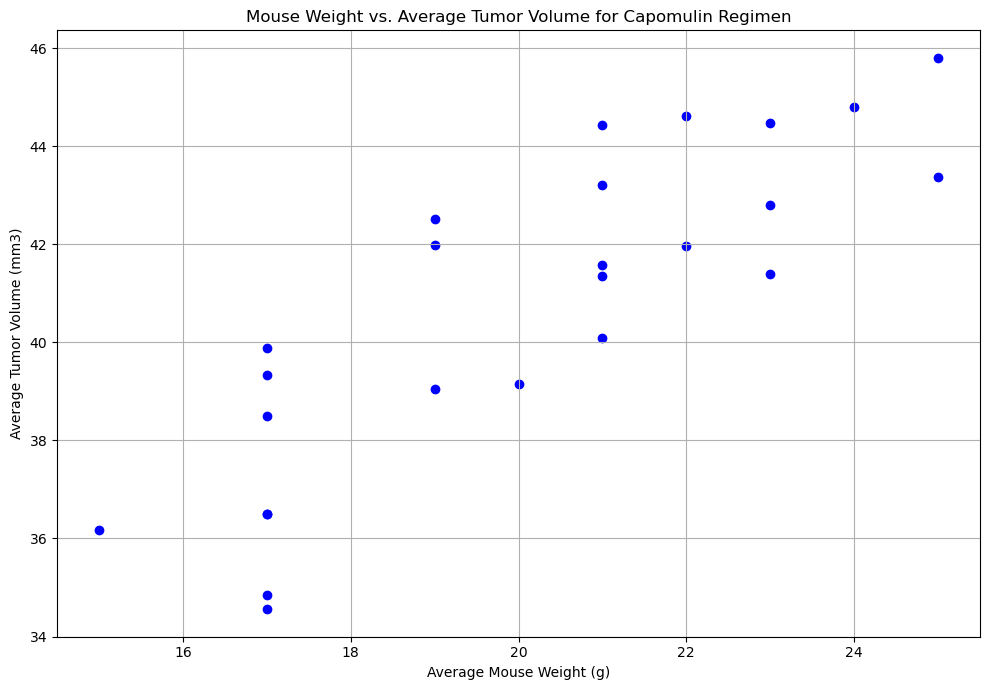

In [369]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get average weight and tumor volume for each mouse
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg(
    avg_weight=('Weight (g)', 'mean'),
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean')
).reset_index()

# Generate a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(grouped_capomulin['avg_weight'], grouped_capomulin['avg_tumor_volume'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()







## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


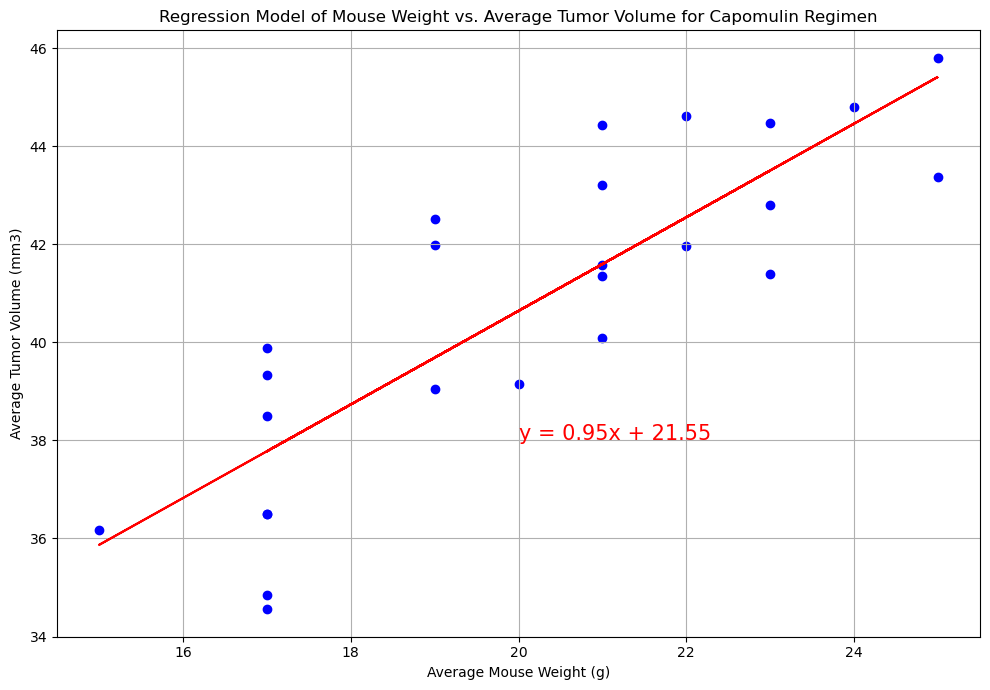

In [370]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_capomulin['avg_weight'], grouped_capomulin['avg_tumor_volume'])
regression_values = grouped_capomulin['avg_weight'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {rvalue:.2f}")

# Plot the data points and regression line
plt.figure(figsize=(10, 7))
plt.scatter(grouped_capomulin['avg_weight'], grouped_capomulin['avg_tumor_volume'], color='blue')
plt.plot(grouped_capomulin['avg_weight'], regression_values, "r-")
plt.title('Regression Model of Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq, (20, 38), fontsize=15, color="red")
plt.grid(True)
plt.tight_layout()
plt.show()